Imports & plotting config

In [1]:
import os, zipfile, io, sys, textwrap
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8,4)
plt.rcParams["axes.grid"] = True

REPORTS_DIR = Path("/content/reports")
REPORTS_DIR.mkdir(parents=True, exist_ok=True)

Upload your CSV

In [2]:
# 3) Load CSV from files already in the Colab workspace
# It will prefer aw_fb_data.csv (combined), else fall back to the others.

import os, glob
import pandas as pd

# Priority order (edit if you want a different default)
CANDIDATES = [
    "aw_fb_data.csv",        # combined file
    "data_for_weka_aw.csv",  # apple watch
    "data_for_weka_fb.csv",  # fitbit
]

# Let you override manually (set to a filename in the list above)
TARGET_FILE = None  # e.g., "data_for_weka_aw.csv"

def read_csv_robust(path):
    try:
        return pd.read_csv(path)
    except UnicodeDecodeError:
        return pd.read_csv(path, encoding="latin1")

# Resolve the file to use
if TARGET_FILE is not None and os.path.exists(TARGET_FILE):
    fname = TARGET_FILE
else:
    # choose the first existing candidate
    existing = [f for f in CANDIDATES if os.path.exists(f)]
    if existing:
        fname = existing[0]
    else:
        # last resort: any CSV in the folder
        csvs = sorted(glob.glob("*.csv"))
        fname = csvs[0] if csvs else None

assert fname is not None, "No CSV found in the workspace. Make sure a CSV is in /content and re-run."

raw_df = read_csv_robust(fname).copy()
print(f"Loaded: {fname} | shape: {raw_df.shape}")
display(raw_df.head(10))

# (optional) quick peek at columns
print("\nColumns:", list(raw_df.columns))

Loaded: aw_fb_data.csv | shape: (6264, 20)


,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying
5,6,6,20,1,168.0,65.4,14.290909,78.803129,11.495667,0.011174,6.221612,6.116349,59.0,1.000000,19.803129,0.140448,0.264722,0.159691,apple watch,Sitting
6,7,7,20,1,168.0,65.4,14.994805,78.890564,12.166222,0.011744,6.221612,6.116349,59.0,1.000000,19.890564,0.141068,0.264722,0.176096,apple watch,Sitting
7,8,8,20,1,168.0,65.4,15.698701,78.977999,12.836778,0.012313,6.221612,6.116349,59.0,1.000000,19.977999,0.141688,0.264722,0.193303,apple watch,Sitting
8,9,9,20,1,168.0,65.4,16.402597,79.065434,13.507333,0.012883,6.221612,6.116349,59.0,1.000000,20.065434,0.142308,0.264722,0.211311,apple watch,Sitting
9,10,10,20,1,168.0,65.4,17.106494,79.152869,14.177889,0.013452,6.221612,6.116349,59.0,1.000000,20.152869,0.142928,0.264722,0.230121,apple watch,Sitting



Columns: ['Unnamed: 0', 'X1', 'age', 'gender', 'height', 'weight', 'steps', 'hear_rate', 'calories', 'distance', 'entropy_heart', 'entropy_setps', 'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen', 'sd_norm_heart', 'steps_times_distance', 'device', 'activity']


Quick schema peek

In [3]:
print("Columns:", list(raw_df.columns))
print("\nInfo:")
print(raw_df.info())

Columns: ['Unnamed: 0', 'X1', 'age', 'gender', 'height', 'weight', 'steps', 'hear_rate', 'calories', 'distance', 'entropy_heart', 'entropy_setps', 'resting_heart', 'corr_heart_steps', 'norm_heart', 'intensity_karvonen', 'sd_norm_heart', 'steps_times_distance', 'device', 'activity']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6264 entries, 0 to 6263
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6264 non-null   int64  
 1   X1                    6264 non-null   int64  
 2   age                   6264 non-null   int64  
 3   gender                6264 non-null   int64  
 4   height                6264 non-null   float64
 5   weight                6264 non-null   float64
 6   steps                 6264 non-null   float64
 7   hear_rate             6264 non-null   float64
 8   calories              6264 non-null   float64
 9   distance              6264 non-null  

Cleaning helpers (rename → types → categories)

In [4]:
def clean_columns(df: pd.DataFrame) -> pd.DataFrame:
    # Standardize column names and fix common typos / variants in your files
    rename_map = {
        # Typos/variants from your combined file
        "hear_rate": "heart_rate",
        "entropy_setps": "entropy_steps",
        "norm_heart": "normalized_heart_rate",
        "sd_norm_heart": "sd_normalized_heart_rate",
        "steps_times_distance": "steps_x_distance",
        # AppleWatch prefixed columns from AW-only file
        "Applewatch.Steps_LE": "steps",
        "Applewatch.Heart_LE": "heart_rate",
        "Applewatch.Calories_LE": "calories",
        "Applewatch.Distance_LE": "distance",
        "EntropyApplewatchHeartPerDay_LE": "entropy_heart",
        "EntropyApplewatchStepsPerDay_LE": "entropy_steps",
        "RestingApplewatchHeartrate_LE": "resting_heart",
        "CorrelationApplewatchHeartrateSteps_LE": "corr_heart_steps",
        "NormalizedApplewatchHeartrate_LE": "normalized_heart_rate",
        "ApplewatchIntensity_LE": "intensity_karvonen",
        "StdNormalizedApplewatchHeartrate_LE": "sd_normalized_heart_rate",
        "ApplewatchStepsTimesDistance_LE": "steps_x_distance",
    }
    out = df.rename(columns=rename_map).copy()
    # Drop unnamed index columns
    out = out.loc[:, ~out.columns.astype(str).str.startswith("Unnamed")]
    return out

def coerce_types(df: pd.DataFrame) -> pd.DataFrame:
    numeric_cols = [
        "age","height","weight","steps","heart_rate","calories","distance",
        "entropy_heart","entropy_steps","resting_heart","corr_heart_steps",
        "normalized_heart_rate","intensity_karvonen","sd_normalized_heart_rate",
        "steps_x_distance"
    ]
    for c in numeric_cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")
    for c in ["gender","device","activity"]:
        if c in df.columns:
            df[c] = df[c].astype("category")
    return df

def standardize_categories(df: pd.DataFrame) -> pd.DataFrame:
    # activity canonicalization
    if "activity" in df.columns:
        mapping = {
            "Lying":"Lying",
            "Sitting":"Sitting",
            "Standing":"Standing",
            "Walking":"Walking",
            "Climbing_Stairs":"Climbing Stairs",
            "Downstairs":"Downstairs",
            "Jogging":"Jogging",
            "Running":"Running",
            "Biking":"Biking",
            "Sleeping":"Sleeping"
        }
        df["activity"] = df["activity"].astype(str).map(lambda x: mapping.get(x, x))
        df["activity"] = df["activity"].astype("category")
    # gender numeric → label (if present)
    if "gender" in df.columns:
        df["gender"] = df["gender"].replace({0:"Unknown", 1:"Male", 2:"Female"})
        df["gender"] = df["gender"].astype("category")
    return df

In [5]:
df = clean_columns(raw_df)
df = coerce_types(df)
df = standardize_categories(df)

print("Shape:", df.shape)
print("Columns:", list(df.columns))
df.head(10)

Shape: (6264, 19)
Columns: ['X1', 'age', 'gender', 'height', 'weight', 'steps', 'heart_rate', 'calories', 'distance', 'entropy_heart', 'entropy_steps', 'resting_heart', 'corr_heart_steps', 'normalized_heart_rate', 'intensity_karvonen', 'sd_normalized_heart_rate', 'steps_x_distance', 'device', 'activity']


/tmp/ipython-input-66450480.py:63: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["gender"] = df["gender"].replace({0:"Unknown", 1:"Male", 2:"Female"})


,X1,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_steps,resting_heart,corr_heart_steps,normalized_heart_rate,intensity_karvonen,sd_normalized_heart_rate,steps_x_distance,device,activity
0,1,20,Male,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,2,20,Male,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,3,20,Male,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,4,20,Male,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,5,20,Male,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying
5,6,20,Male,168.0,65.4,14.290909,78.803129,11.495667,0.011174,6.221612,6.116349,59.0,1.000000,19.803129,0.140448,0.264722,0.159691,apple watch,Sitting
6,7,20,Male,168.0,65.4,14.994805,78.890564,12.166222,0.011744,6.221612,6.116349,59.0,1.000000,19.890564,0.141068,0.264722,0.176096,apple watch,Sitting
7,8,20,Male,168.0,65.4,15.698701,78.977999,12.836778,0.012313,6.221612,6.116349,59.0,1.000000,19.977999,0.141688,0.264722,0.193303,apple watch,Sitting
8,9,20,Male,168.0,65.4,16.402597,79.065434,13.507333,0.012883,6.221612,6.116349,59.0,1.000000,20.065434,0.142308,0.264722,0.211311,apple watch,Sitting
9,10,20,Male,168.0,65.4,17.106494,79.152869,14.177889,0.013452,6.221612,6.116349,59.0,1.000000,20.152869,0.142928,0.264722,0.230121,apple watch,Sitting


Basic summaries: numeric + categorical

In [6]:
# Numeric summary
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=["category","object"]).columns.tolist()

display(df[num_cols].describe().T)

# Categorical counts (top 20 categories each)
for c in cat_cols:
    print(f"\n=== {c} (top 20) ===")
    display(df[c].value_counts(dropna=False).head(20))

,count,mean,std,min,25%,50%,75%,max
X1,6264.0,1771.144317,1097.988748,1.000000,789.750000,1720.000000,2759.250000,3670.000000
age,6264.0,29.158525,8.908978,18.000000,23.000000,28.000000,33.000000,56.000000
height,6264.0,169.709052,10.324698,143.000000,160.000000,168.000000,180.000000,191.000000
weight,6264.0,69.614464,13.451878,43.000000,60.000000,68.000000,77.300000,115.000000
steps,6264.0,109.562268,222.797908,1.000000,5.159534,10.092029,105.847222,1714.000000
heart_rate,6264.0,86.142331,28.648385,2.222222,75.598079,77.267680,95.669118,194.333333
calories,6264.0,19.471823,27.309765,0.056269,0.735875,4.000000,20.500000,97.500000
distance,6264.0,13.832555,45.941437,0.000440,0.019135,0.181719,15.697188,335.000000
entropy_heart,6264.0,6.030314,0.765574,0.000000,6.108524,6.189825,6.247928,6.475733
entropy_steps,6264.0,5.739984,1.256348,0.000000,5.909440,6.157197,6.247928,6.475733



=== gender (top 20) ===


,count
gender,
Unknown,3279
Male,2985



=== device (top 20) ===


,count
device,
apple watch,3656
fitbit,2608



=== activity (top 20) ===


,count
activity,
Lying,1379
Running 7 METs,1114
Running 5 METs,1002
Running 3 METs,950
Sitting,930
Self Pace walk,889


Missing values profile

,missing_%
X1,0.0
age,0.0
gender,0.0
height,0.0
weight,0.0
steps,0.0
heart_rate,0.0
calories,0.0
distance,0.0
entropy_heart,0.0


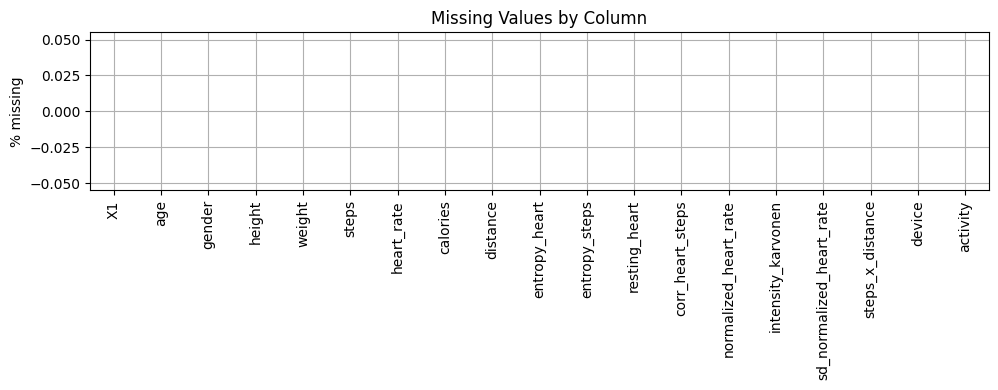

In [7]:
na_pct = df.isna().mean().sort_values(ascending=False)*100
display(na_pct.to_frame("missing_%"))

# Simple bar chart of missingness
plt.figure(figsize=(10,4))
na_pct.plot(kind="bar")
plt.ylabel("% missing")
plt.title("Missing Values by Column")
plt.tight_layout()
plt.savefig(REPORTS_DIR/"missing_values.png")
plt.show()

Distributions (histograms)

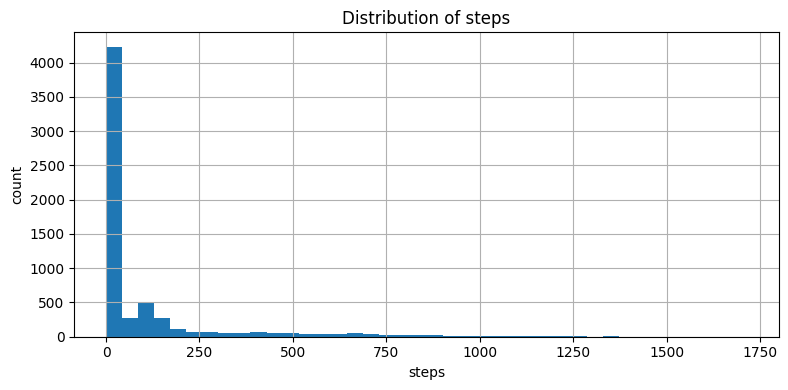

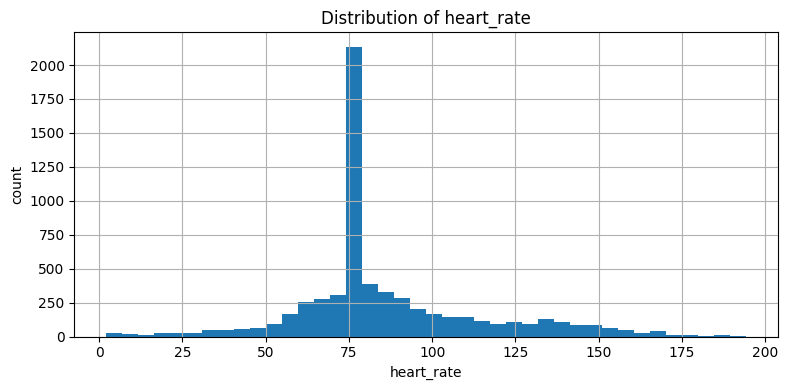

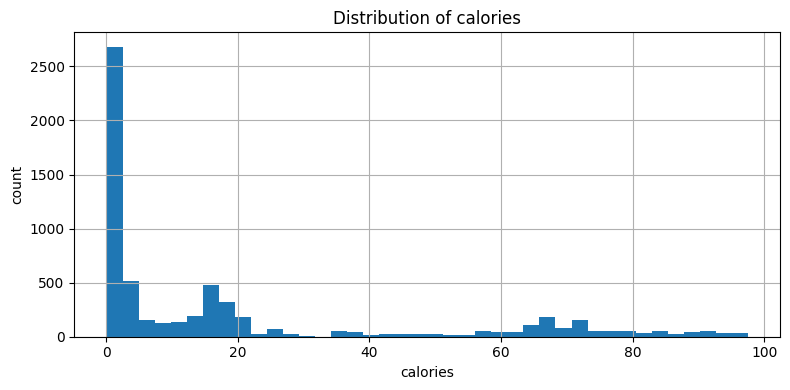

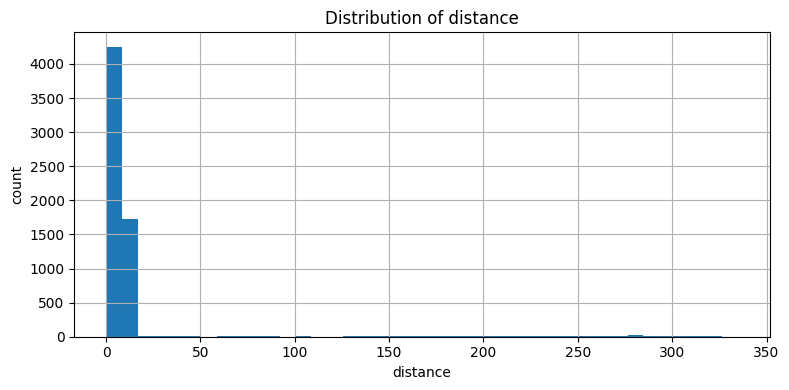

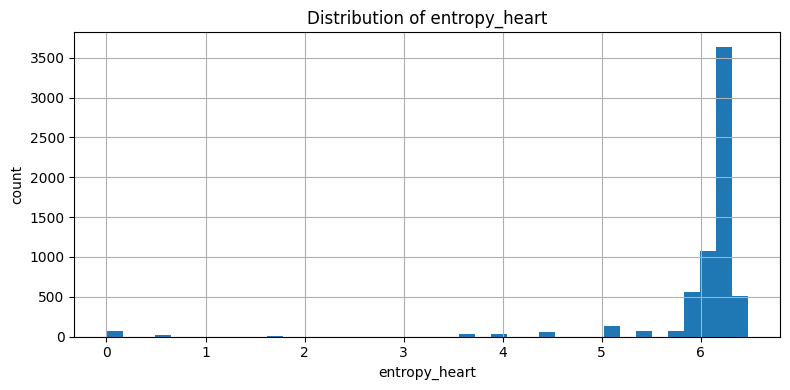

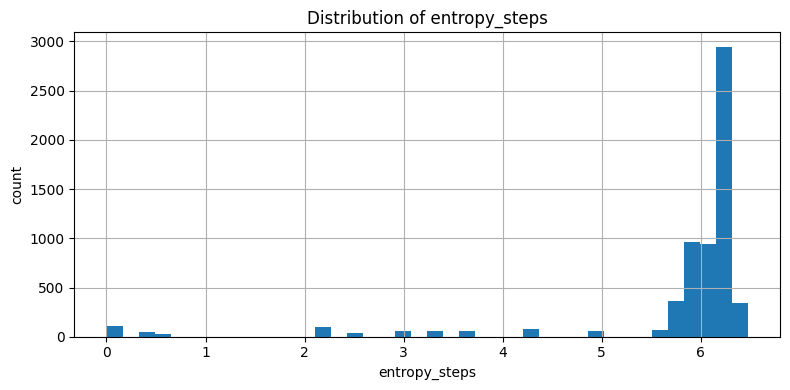

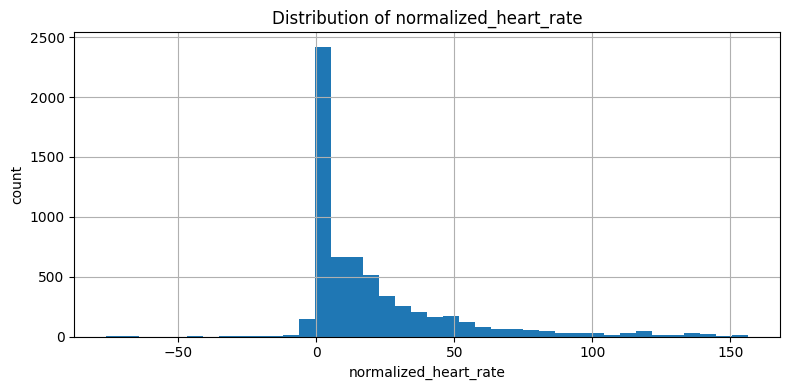

In [8]:
def hist_plot(col, bins=40):
    if col not in df.columns:
        return
    plt.figure()
    df[col].dropna().plot(kind="hist", bins=bins)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col); plt.ylabel("count")
    plt.tight_layout()
    plt.savefig(REPORTS_DIR/f"hist_{col}.png")
    plt.show()

for c in ["steps","heart_rate","calories","distance","entropy_heart","entropy_steps","normalized_heart_rate"]:
    hist_plot(c)

Activity distribution (how much of each activity)

,count
activity,
Lying,1379
Running 7 METs,1114
Running 5 METs,1002
Running 3 METs,950
Sitting,930
Self Pace walk,889


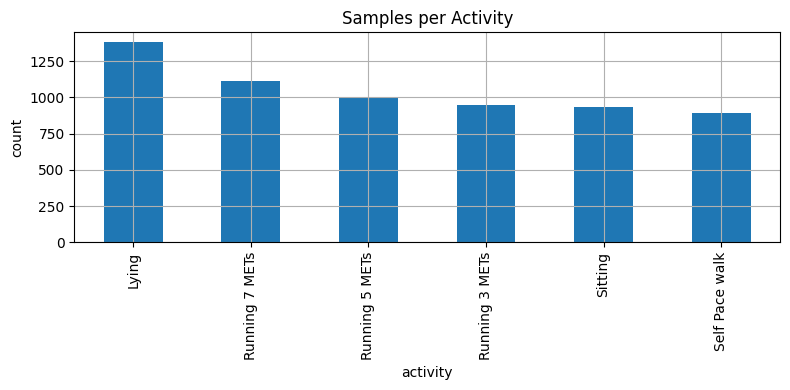

In [9]:
if "activity" in df.columns:
    act_counts = df["activity"].value_counts().sort_values(ascending=False)
    display(act_counts)
    plt.figure(figsize=(8,4))
    act_counts.plot(kind="bar")
    plt.title("Samples per Activity")
    plt.xlabel("activity"); plt.ylabel("count")
    plt.tight_layout()
    plt.savefig(REPORTS_DIR/"activity_counts.png")
    plt.show()

Boxplots by activity (steps, heart rate, calories, distance)

/tmp/ipython-input-2813043672.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=acts, vert=True, showfliers=False)


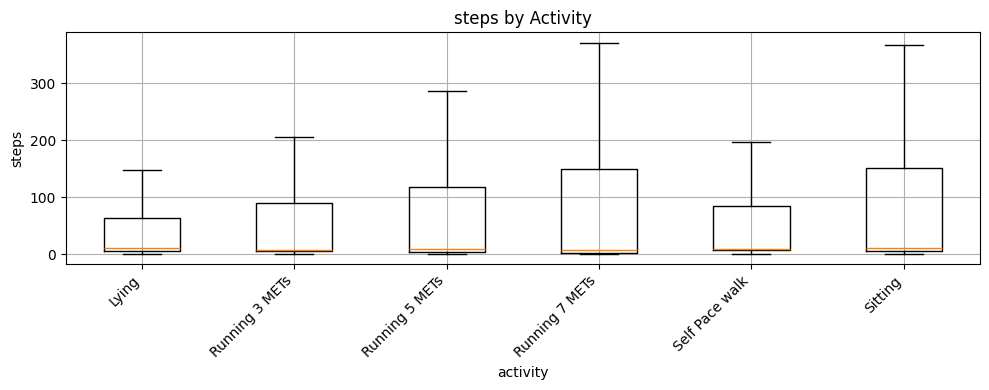

/tmp/ipython-input-2813043672.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=acts, vert=True, showfliers=False)


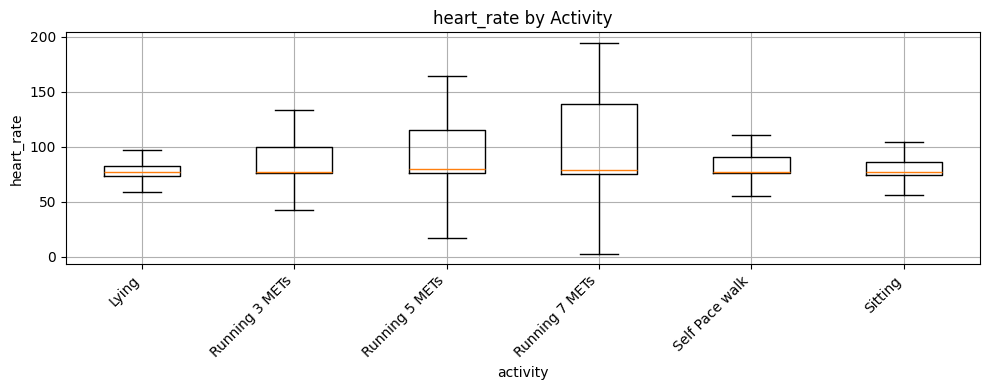

/tmp/ipython-input-2813043672.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=acts, vert=True, showfliers=False)


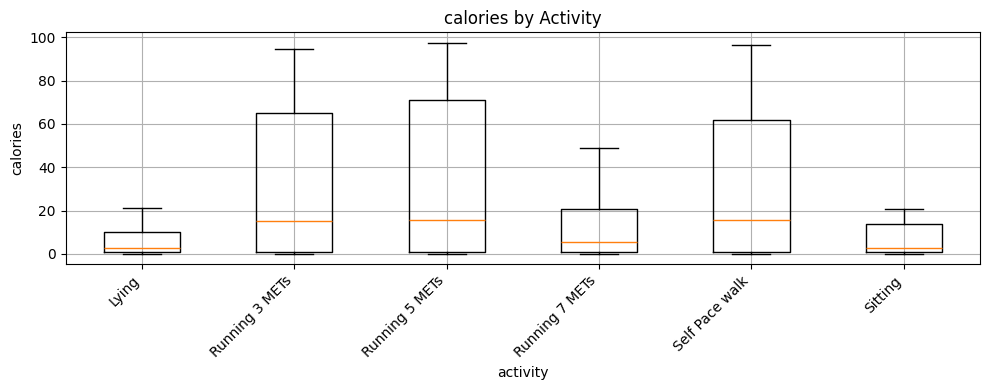

/tmp/ipython-input-2813043672.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=acts, vert=True, showfliers=False)


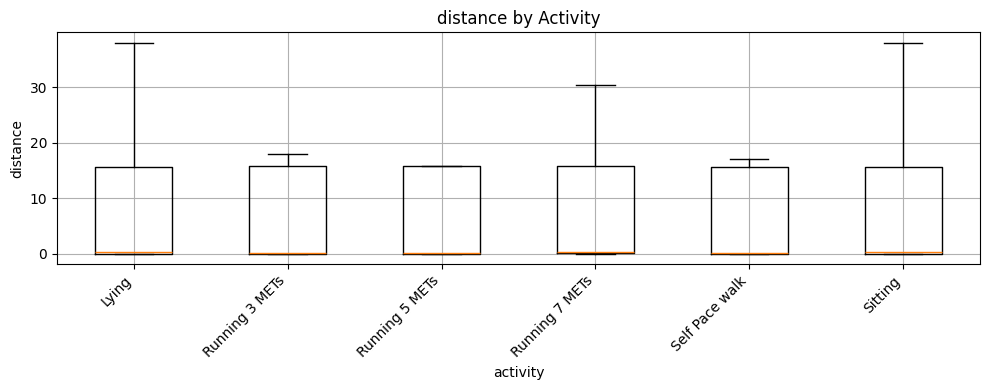

In [10]:
def box_by_activity(metric):
    if metric in df.columns and "activity" in df.columns:
        plt.figure(figsize=(10,4))
        acts = sorted(df["activity"].dropna().unique())
        data = [df.loc[df["activity"]==a, metric].dropna().values for a in acts]
        plt.boxplot(data, labels=acts, vert=True, showfliers=False)
        plt.title(f"{metric} by Activity")
        plt.xlabel("activity"); plt.ylabel(metric)
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.savefig(REPORTS_DIR/f"box_{metric}_by_activity.png")
        plt.show()

for metric in ["steps","heart_rate","calories","distance"]:
    box_by_activity(metric)

Relationships (scatter: steps vs heart_rate; steps vs distance proxy)

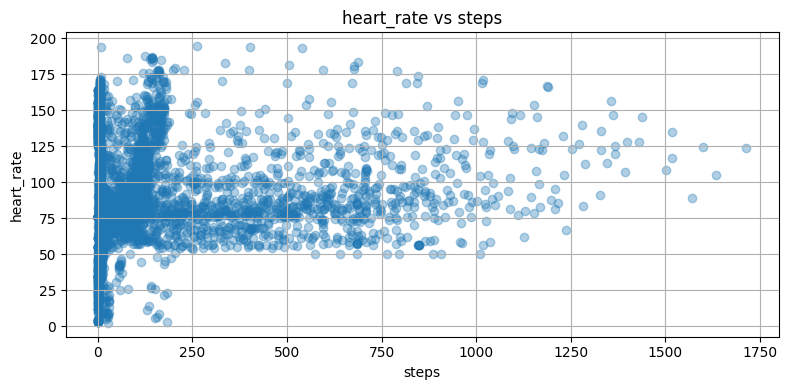

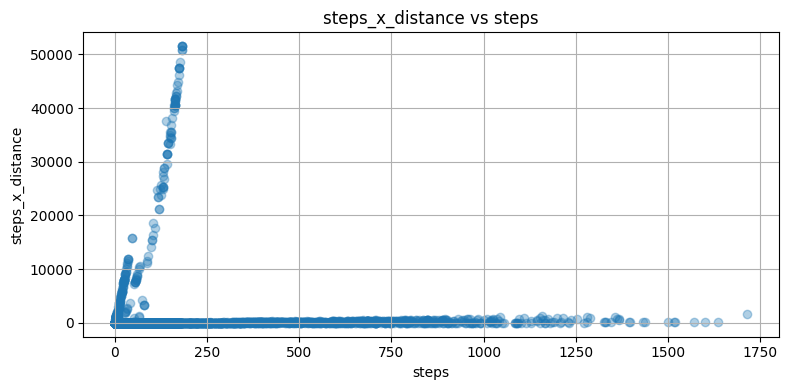

In [11]:
def scatter_xy(x, y):
    if x in df.columns and y in df.columns:
        plt.figure()
        plt.scatter(df[x], df[y], alpha=0.35)
        plt.title(f"{y} vs {x}")
        plt.xlabel(x); plt.ylabel(y)
        plt.tight_layout()
        plt.savefig(REPORTS_DIR/f"scatter_{x}_vs_{y}.png")
        plt.show()

scatter_xy("steps", "heart_rate")
if "steps_x_distance" in df.columns:
    scatter_xy("steps","steps_x_distance")

Correlation heatmap

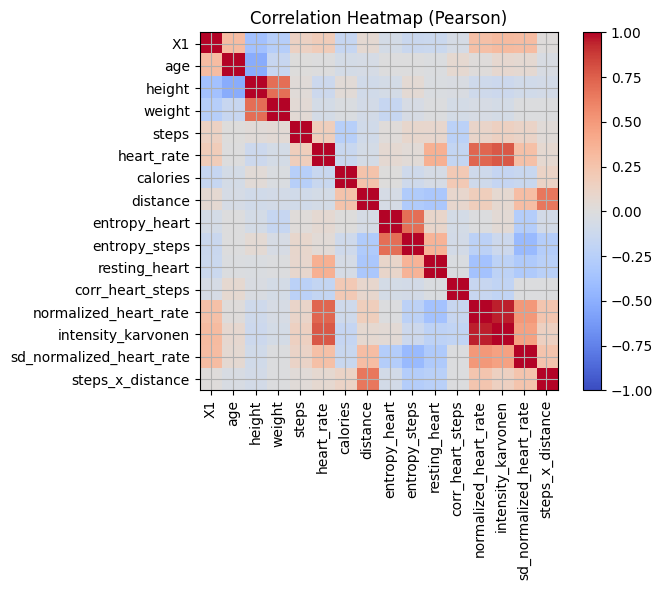

Top correlations with heart_rate:


,heart_rate
intensity_karvonen,0.780478
normalized_heart_rate,0.723648
resting_heart,0.382275
sd_normalized_heart_rate,0.280313
X1,0.181164
weight,-0.064317
distance,-0.068879
height,-0.123519
calories,-0.141972
corr_heart_steps,-0.174136


In [12]:
num_df = df[num_cols].copy()
corr = num_df.corr(method="pearson")

plt.figure(figsize=(8,6))
im = plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation Heatmap (Pearson)")
plt.tight_layout()
plt.savefig(REPORTS_DIR/"corr_heatmap.png")
plt.show()

# Top positive/negative correlations with heart_rate (if present)
if "heart_rate" in corr.columns:
    hr_corr = corr["heart_rate"].drop("heart_rate").sort_values(ascending=False)
    print("Top correlations with heart_rate:")
    display(pd.concat([hr_corr.head(5), hr_corr.tail(5)]))

Aggregations by activity & device

In [13]:
agg_metrics = ["steps","heart_rate","calories","distance"]
present = [c for c in agg_metrics if c in df.columns]

if "activity" in df.columns and present:
    act_agg = df.groupby("activity")[present].agg(["mean","median","std","count"]).sort_values((present[0],"mean"), ascending=False)
    display(act_agg)
    act_agg.to_csv("/content/activity_aggregations.csv", index=True)

if "device" in df.columns and present:
    dev_agg = df.groupby("device")[present].agg(["mean","median","std","count"]).sort_values((present[0],"mean"), ascending=False)
    display(dev_agg)
    dev_agg.to_csv("/content/device_aggregations.csv", index=True)

/tmp/ipython-input-2841947258.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  act_agg = df.groupby("activity")[present].agg(["mean","median","std","count"]).sort_values((present[0],"mean"), ascending=False)


steps                              heart_rate             \
                      mean     median         std count       mean     median   
activity                                                                        
Running 7 METs  139.742256   6.916667  268.155074  1114  97.756087  79.302672   
Sitting         132.277651  10.190704  226.527395   930  81.346485  77.219918   
Running 5 METs  111.964060   9.500000  239.086866  1002  91.104565  80.194570   
Lying            96.853795  10.508544  201.361168  1379  79.389118  77.256780   
Running 3 METs   94.572186   7.639676  201.868316   950  85.125682  76.920393   
Self Pace walk   81.005634   9.278195  179.958707   889  82.575124  77.230769   

                                  calories                              \
                      std count       mean     median        std count   
activity                                                                 
Running 7 METs  42.935521  1114  16.538612   5.500000  24.791062  1114   
Sitting         22.073210   930  11.526257   2.500000  19.919685   930   
Running 5 METs  29.445144  1002  30.262551  15.698700  35.041971  1002   
Lying           22.252712  1379   7.923465   2.500000  13.731485  1379   
Running 3 METs  21.365692   950  28.102023  15.327125  29.821981   950   
Self Pace walk  20.710010   889  27.988315  15.458375  29.662500   889   

                 distance                             
                     mean    median        std count  
activity                                              
Running 7 METs  16.802184  0.316949  55.008673  1114  
Sitting         13.529701  0.250203  44.294478   930  
Running 5 METs  13.544277  0.099750  47.134654  1002  
Lying           11.743491  0.216188  40.154517  1379  
Running 3 METs  12.749358  0.075070  40.947529   950  
Self Pace walk  15.151113  0.075000  47.131413   889

/tmp/ipython-input-2841947258.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dev_agg = df.groupby("device")[present].agg(["mean","median","std","count"]).sort_values((present[0],"mean"), ascending=False)


steps                              heart_rate             \
                   mean     median         std count       mean     median   
device                                                                       
apple watch  180.246421  60.133571  269.437917  3656  91.250821  83.624783   
fitbit        10.474360   5.561156   25.343804  2608  78.981043  76.402296   

                               calories                            distance  \
                   std count       mean  median        std count       mean   
device                                                                        
apple watch  26.753167  3656   5.783917   0.756   7.278513  3656   0.084236   
fitbit       29.670698  2608  38.660084  36.000  32.960551  2608  33.105505   

                                         
                median        std count  
device                                   
apple watch   0.030825   0.136905  3656  
fitbit       15.716491  66.586856  2608

Simple outlier flagging (IQR method

In [14]:
def iqr_outliers(s: pd.Series, k=1.5):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - k*iqr, q3 + k*iqr
    return (s < lower) | (s > upper)

outlier_cols = [c for c in ["steps","heart_rate","calories","distance"] if c in df.columns]
flags = pd.DataFrame(index=df.index)

for c in outlier_cols:
    flags[f"{c}_outlier"] = iqr_outliers(df[c].dropna()).reindex(df.index, fill_value=False)

flags["any_outlier"] = flags.any(axis=1)
print("Outliers flagged:", int(flags["any_outlier"].sum()), "rows")

# (Optional) create filtered view
df_no_out = df.loc[~flags["any_outlier"]].copy()
print("Filtered shape:", df_no_out.shape)

Outliers flagged: 2746 rows
Filtered shape: (3518, 19)


Business insights

In [17]:
# Clean, explicit, and nicely formatted (no warnings)
insights = []

def top_mean(df, by_col, value_col, k=3):
    if by_col not in df.columns or value_col not in df.columns:
        return None
    # observed=True avoids the FutureWarning for categorical groupers
    return (df.groupby(by_col, observed=True)[value_col]
              .mean()
              .sort_values(ascending=False)
              .head(k))

ts = top_mean(df, "activity", "steps", k=3)
if ts is not None:
    insights.append("Top activities by avg steps: " +
                    ", ".join([f"{idx} ({val:.0f})" for idx, val in ts.items()]))

thr = top_mean(df, "activity", "heart_rate", k=3)
if thr is not None:
    insights.append("Top activities by avg heart rate: " +
                    ", ".join([f"{idx} ({val:.1f} bpm)" for idx, val in thr.items()]))

if all(c in df.columns for c in ["steps","heart_rate"]):
    r = df[["steps","heart_rate"]].dropna().corr(method="pearson").iloc[0,1]
    insights.append(f"Correlation between steps and heart rate: {r:.2f} (Pearson)")

print("Key Insights:")
for s in insights:
    print("-", s)

Key Insights:
- Top activities by avg steps: Running 7 METs (140), Sitting (132), Running 5 METs (112)
- Top activities by avg heart rate: Running 7 METs (97.8 bpm), Running 5 METs (91.1 bpm), Running 3 METs (85.1 bpm)
- Correlation between steps and heart rate: 0.16 (Pearson)


Download Data

In [16]:
CLEAN_PATH = "/content/clean_apple_watch.csv"
df.to_csv(CLEAN_PATH, index=False)
print("Saved cleaned dataset:", CLEAN_PATH)

# Zip the reports for easy download
zip_path = "/content/reports_figures.zip"
with zipfile.ZipFile(zip_path, "w", zipfile.ZIP_DEFLATED) as zf:
    for p in REPORTS_DIR.glob("*.png"):
        zf.write(p, arcname=p.name)

print("Saved figures ZIP:", zip_path)

Saved cleaned dataset: /content/clean_apple_watch.csv
Saved figures ZIP: /content/reports_figures.zip
